In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print('python:\t\t',sys.version,
     '\nnumpy:\t\t',np.__version__,
      '\ntensorflow:\t',tf.__version__)

python:		 3.6.5 (v3.6.5:f59c0932b4, Mar 28 2018, 17:00:18) [MSC v.1900 64 bit (AMD64)] 
numpy:		 1.15.4 
tensorflow:	 1.12.0


In [3]:
#loading dataset
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

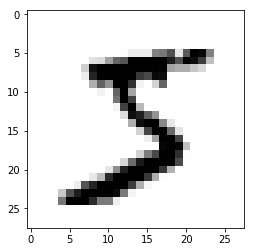

In [4]:
#sample data
plt.imshow(x_train[0],cmap=plt.cm.binary)
#converted the image in b&w
plt.show()

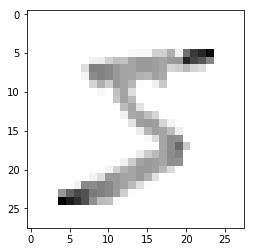

In [5]:
#normalization of the data
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.show()

In [10]:
#model
model = tf.keras.models.Sequential()

#adding the layers

#input layer
model.add(tf.keras.layers.Flatten())

#hidden layer
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))

#output layer
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

#optimizer reduces the loss function like gradient descent
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

#fitting the model
model.fit(x_train,y_train,epochs = 6)

Epoch 1/6
60000/60000 [==============================] - 7s 121us/step - loss: 0.2587 - acc: 0.9240
Epoch 2/6
60000/60000 [==============================] - 7s 114us/step - loss: 0.1050 - acc: 0.9682
Epoch 3/6
60000/60000 [==============================] - 7s 113us/step - loss: 0.0708 - acc: 0.9781
Epoch 4/6
60000/60000 [==============================] - 7s 113us/step - loss: 0.0521 - acc: 0.9832
Epoch 5/6
60000/60000 [==============================] - 7s 113us/step - loss: 0.0404 - acc: 0.9870
Epoch 6/6
60000/60000 [==============================] - 7s 113us/step - loss: 0.0316 - acc: 0.9896


In [14]:
#making predictions
predictions = model.predict([x_test])

In [30]:
#probability distribution
predictions

array([[2.3986971e-12, 1.3650867e-09, 6.4448756e-08, ..., 9.9999666e-01,
        6.3759342e-10, 6.8830088e-09],
       [2.6953402e-09, 1.4758822e-04, 9.9978787e-01, ..., 6.8812698e-09,
        9.4007255e-06, 1.5730523e-11],
       [6.2831531e-09, 9.9981421e-01, 1.2159315e-05, ..., 1.3360351e-04,
        1.7947028e-05, 2.9872754e-07],
       ...,
       [1.8169216e-07, 5.2448395e-06, 1.2312803e-06, ..., 1.3305218e-04,
        2.0649928e-05, 2.0512563e-04],
       [6.8472097e-08, 2.0126458e-06, 1.8073703e-08, ..., 2.2367799e-06,
        3.1463092e-05, 2.4737947e-09],
       [9.2204061e-08, 3.3973961e-09, 3.4449737e-08, ..., 5.3065333e-11,
        3.2419312e-08, 1.0761473e-09]], dtype=float32)

running test...
10000/10000 [==============================] - 0s 44us/step

overall accuracy: 0.9757 	overall loss 0.0891009436358232


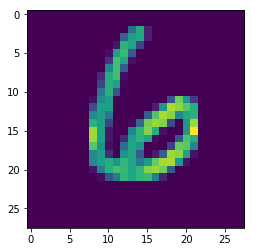

predictions: 6


In [45]:
print('running test...')

#calculating overall accuracy
v_loss,v_accuracy = model.evaluate(x_test,y_test)

print('\noverall accuracy:',v_accuracy,'\toverall loss',v_loss)

#predicting
index = np.random.randint(x_test.shape[0])
plt.imshow(x_test[index])
plt.show()
print('predictions:',np.argmax(predictions[index]))